In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

# Set up vibrant visualization settings
sns.set_theme(style="whitegrid", palette="pastel")


In [2]:
# Specify the ZIP file name
zip_filename = 'archive.zip'

# Extract files from the ZIP file
with ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content/')
    print(f"Extracted files: {zip_ref.namelist()}")


Extracted files: ['images/10000.jpg', 'images/10001.jpg', 'images/10002.jpg', 'images/10003.jpg', 'images/10004.jpg', 'images/10005.jpg', 'images/10006.jpg', 'images/10007.jpg', 'images/10008.jpg', 'images/10009.jpg', 'images/10010.jpg', 'images/10011.jpg', 'images/10012.jpg', 'images/10013.jpg', 'images/10014.jpg', 'images/10015.jpg', 'images/10016.jpg', 'images/10017.jpg', 'images/10018.jpg', 'images/10019.jpg', 'images/10020.jpg', 'images/10021.jpg', 'images/10022.jpg', 'images/10023.jpg', 'images/10024.jpg', 'images/10025.jpg', 'images/10026.jpg', 'images/10027.jpg', 'images/10028.jpg', 'images/10029.jpg', 'images/10030.jpg', 'images/10031.jpg', 'images/10032.jpg', 'images/10033.jpg', 'images/10034.jpg', 'images/10035.jpg', 'images/10037.jpg', 'images/10039.jpg', 'images/10040.jpg', 'images/10041.jpg', 'images/10042.jpg', 'images/10043.jpg', 'images/10044.jpg', 'images/10045.jpg', 'images/10046.jpg', 'images/10047.jpg', 'images/10048.jpg', 'images/10049.jpg', 'images/10050.jpg', 'i

In [3]:
# Specify the path to the extracted dataset (adjust as necessary)
dataset_path = '/content/styles.csv'

# Load the dataset while skipping problematic rows
df = pd.read_csv(dataset_path, encoding='utf-8', on_bad_lines='skip')

# Use only the first 5000 rows
df = df.head(5000)

# Display basic information
print("Dataset loaded successfully.")
print(df.info())
print(df.head())


Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   gender              5000 non-null   object 
 2   masterCategory      5000 non-null   object 
 3   subCategory         5000 non-null   object 
 4   articleType         5000 non-null   object 
 5   baseColour          5000 non-null   object 
 6   season              4999 non-null   object 
 7   year                5000 non-null   float64
 8   usage               4953 non-null   object 
 9   productDisplayName  4999 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 390.8+ KB
None
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        J

In [4]:
# Count and display the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             0
season                 1
year                   0
usage                 47
productDisplayName     1
dtype: int64


In [5]:
# Fill missing values with appropriate defaults
df['baseColour'].fillna('Unknown', inplace=True)
df['season'].fillna('Unknown', inplace=True)
df['usage'].fillna('Unknown', inplace=True)
df['year'].fillna(df['year'].mean(), inplace=True)
df['productDisplayName'].fillna('No Name', inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


<ipython-input-5-2beef90cc808>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['baseColour'].fillna('Unknown', inplace=True)
<ipython-input-5-2beef90cc808>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [6]:
# Display basic statistics for numerical columns
print("Basic statistics:")
print(df.describe())


Basic statistics:
                 id         year
count   5000.000000  5000.000000
mean   29832.038200  2012.862400
std    17111.603595     2.142051
min     1607.000000  2010.000000
25%    14856.750000  2011.000000
50%    28638.000000  2012.000000
75%    44916.750000  2015.000000
max    59898.000000  2019.000000


<ipython-input-7-a5902c3796a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='coolwarm')


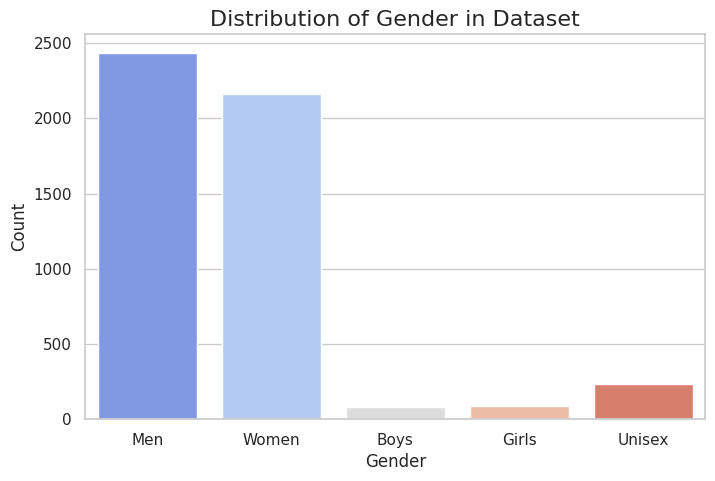

In [7]:
# Plot the distribution of gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', palette='coolwarm')
plt.title("Distribution of Gender in Dataset", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-8-9f4089b4edd9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='masterCategory', palette='cubehelix')


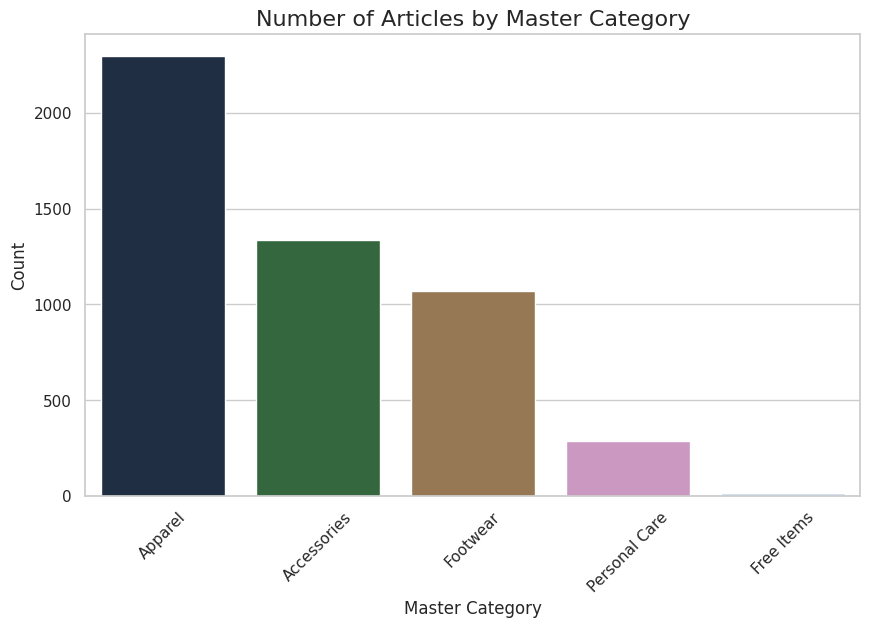

In [8]:
# Plot the number of articles in each master category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='masterCategory', palette='cubehelix')
plt.title("Number of Articles by Master Category", fontsize=16)
plt.xlabel("Master Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


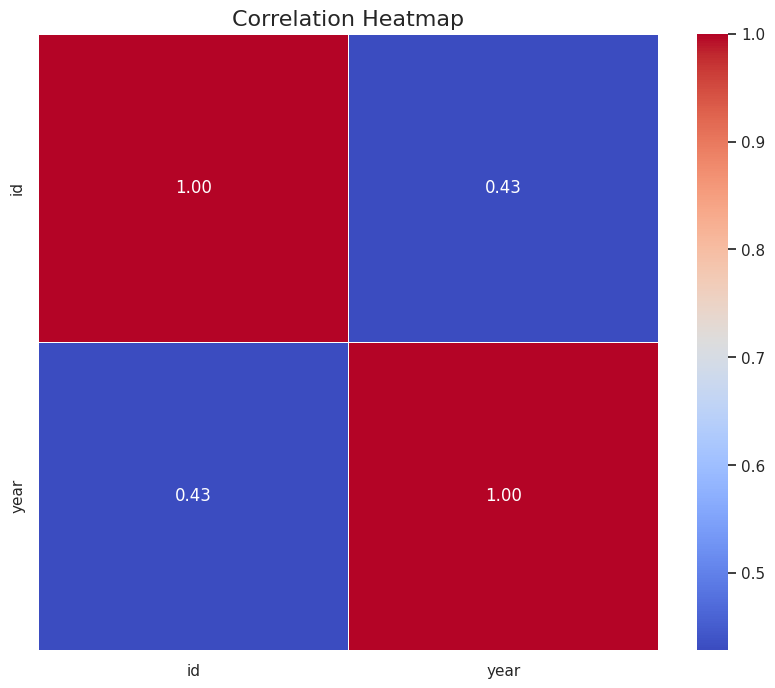

In [9]:
# Filter only numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [10]:
# Create a new column indicating if the product is for "Winter" or not
df['isWinter'] = df['season'].apply(lambda x: 1 if x == 'Winter' else 0)

# Check the new column
print(df[['season', 'isWinter']].head())


   season  isWinter
0    Fall         0
1  Summer         0
2  Winter         1
3    Fall         0
4  Summer         0


In [11]:
# Create a new column indicating if the product is for "Winter" or not
df['isWinter'] = df['season'].apply(lambda x: 1 if x == 'Winter' else 0)

# Check the new column
print(df[['season', 'isWinter']].head())


   season  isWinter
0    Fall         0
1  Summer         0
2  Winter         1
3    Fall         0
4  Summer         0


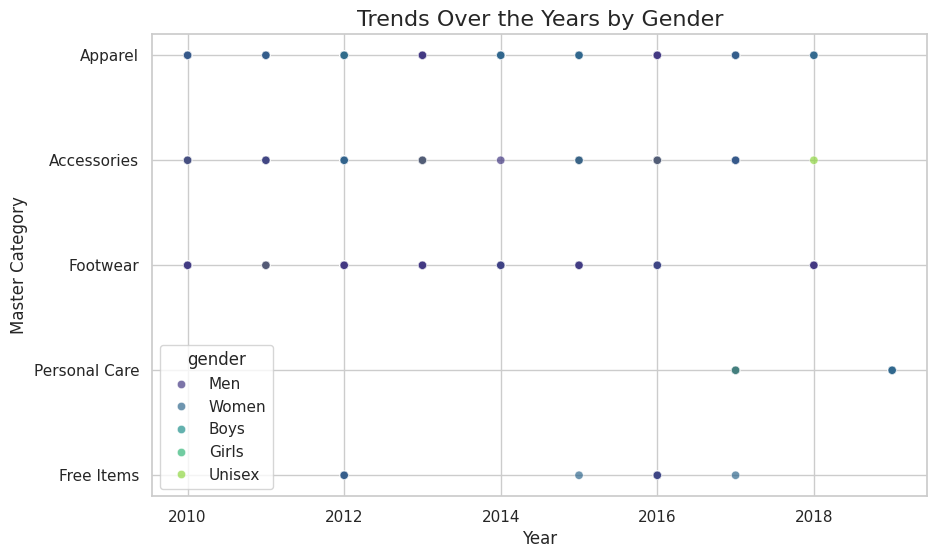

In [16]:
# Scatter plot between year and masterCategory
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='masterCategory', hue='gender', palette='viridis', alpha=0.7)
plt.title("Trends Over the Years by Gender", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Master Category", fontsize=12)
plt.show()


In [17]:
# Save the fully processed data to a CSV file
final_data_path = '/content/processed_styles.csv'
df.to_csv(final_data_path, index=False)
print(f"Processed dataset saved at: {final_data_path}")


Processed dataset saved at: /content/processed_styles.csv


In [18]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Define the path to the images and the CSV output
image_dir = '/content/images'
csv_output = '/content/processed_styles.csv'

# Load the VGG16 model pre-trained on ImageNet, without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model that outputs the features from the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess images and generate embeddings
def generate_embeddings(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    # Flatten the features to create a 1D vector
    return features.flatten()

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Limit to the first 500 images
image_files = image_files[:500]

# Initialize a list to store the image filenames and their corresponding embeddings
embeddings = []

# Generate embeddings for each image
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    embedding = generate_embeddings(img_path)
    embeddings.append([img_file] + embedding.tolist())

# Create a DataFrame and save it as a CSV file
columns = ['image_filename'] + [f'feature_{i+1}' for i in range(len(embeddings[0]) - 1)]
df = pd.DataFrame(embeddings, columns=columns)
df.to_csv(csv_output, index=False)

print(f"Embeddings for the first 500 images have been saved to {csv_output}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972

Recommendations for 13307.jpg:
Image: 55273.jpg, Similarity Score: 0.43253850471396155
Image: 40923.jpg, Similarity Score: 0.4143492103355262
Image: 38991.jpg, Similarity Score: 0.4107692058144361
Image: 28268.jpg, Similarity Score: 0.40264315472910855
Image: 55094.jpg, Similarity Score: 0.39546945164031533


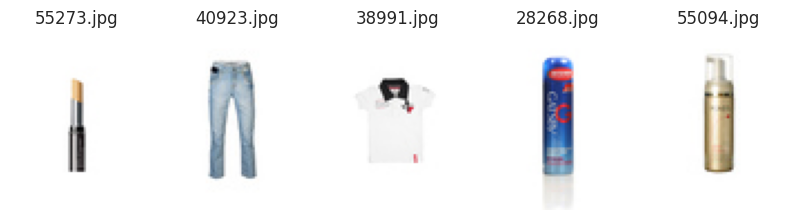

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics.pairwise import cosine_similarity

# Load the image embeddings from the CSV file
csv_input = '/content/processed_styles.csv'
df = pd.read_csv(csv_input)

# Limit to the first 5000 rows
df = df.head(5000)

# Extract image filenames and embeddings
image_filenames = df['image_filename'].values
embeddings = df.drop(['image_filename'], axis=1).values  # Remove 'image_filename' to get the embeddings

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(embeddings)

# Function to get recommendations for a given image index
def get_recommendations(image_index, top_n=5):
    # Get the similarity scores for the given image (excluding itself)
    sim_scores = list(enumerate(cosine_sim[image_index]))

    # Sort the images based on similarity score (in descending order)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar images
    sim_scores = sim_scores[1:top_n+1]  # Exclude the image itself (index 0)

    # Get the image indices, filenames, and similarity scores
    recommended_indices = [x[0] for x in sim_scores]
    recommended_scores = [x[1] for x in sim_scores]
    recommended_images = image_filenames[recommended_indices]

    return recommended_images, recommended_scores, recommended_indices

# Function to display images
def display_images(image_indices, image_filenames):
    plt.figure(figsize=(10, 10))

    for i, idx in enumerate(image_indices):
        img_path = f"/content/images/{image_filenames[idx]}"
        img = mpimg.imread(img_path)
        plt.subplot(1, len(image_indices), i+1)
        plt.imshow(img)
        plt.title(image_filenames[idx])
        plt.axis('off')

    plt.show()

# Example: Get recommendations for the first image (index 0)
image_index = 0
recommended_images, recommended_scores, recommended_indices = get_recommendations(image_index, top_n=5)

# Display the results
print(f"Recommendations for {image_filenames[image_index]}:")
for img, score in zip(recommended_images, recommended_scores):
    print(f"Image: {img}, Similarity Score: {score}")

# Display the recommended images
display_images(recommended_indices, image_filenames)


In [20]:
import pandas as pd

# Step 1: Load the CSV file containing the embeddings
df_embedding2 = pd.read_csv('/content/processed_styles.csv')

# Step 2: Inspect the first few rows of the dataframe to ensure it loaded correctly
print("First few rows of the embeddings dataframe:")
print(df_embedding2.head())

# Step 3: To see the embedding for the first image:
row_index = 0  # Replace 0 with the index of the desired image
embedding_row = df_embedding2.iloc[row_index]

# Step 4: Print the embedding as a list
print("\nEmbedding for the image (as list):")
print(embedding_row.tolist())

# Step 5: Alternatively, view the embedding as a NumPy array
embedding_array = embedding_row.values
print("\nEmbedding as NumPy array:")
print(embedding_array)

# Step 6: Check the shape of the embedding
print("\nShape of the embedding:")
print(embedding_array.shape)


First few rows of the embeddings dataframe:
  image_filename  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      13307.jpg        0.0        0.0        0.0        0.0        0.0   
1       6486.jpg        0.0        0.0        0.0        0.0        0.0   
2      57879.jpg        0.0        0.0        0.0        0.0        0.0   
3      40607.jpg        0.0        0.0        0.0        0.0        0.0   
4      30241.jpg        0.0        0.0        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_25079  \
0        0.0        0.0        0.0        0.0  ...            0.0   
1        0.0        0.0        0.0        0.0  ...            0.0   
2        0.0        0.0        0.0        0.0  ...            0.0   
3        0.0        0.0        0.0        0.0  ...            0.0   
4        0.0        0.0        0.0        0.0  ...            0.0   

   feature_25080  feature_25081  feature_25082  feature_25083  feature_25084  \
0         

<ipython-input-21-7e7dadeb692e>:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model1 = MobileNet(weights='imagenet', include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


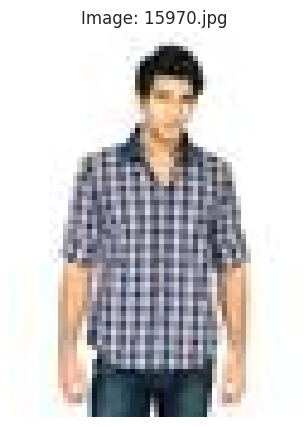

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


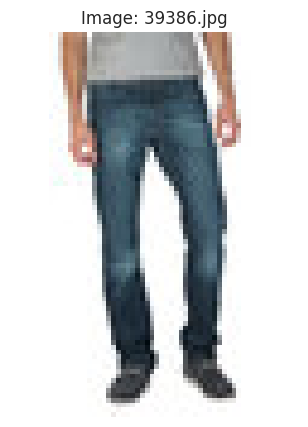

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


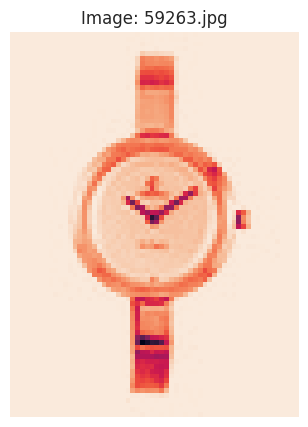

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


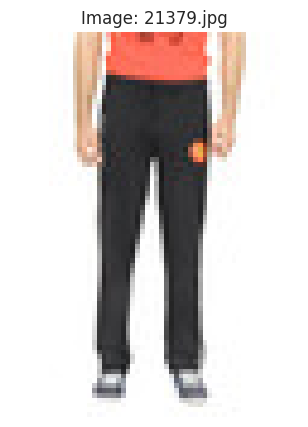

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


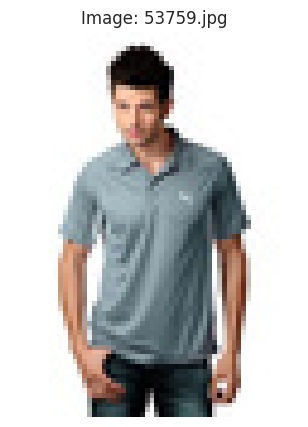

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━

In [21]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image

# Define global parameters
img_width, img_height = 224, 224  # MobileNet input dimensions
save_path = "/content/mobilenet_embeddings/"  # New folder for MobileNet embeddings
os.makedirs(save_path, exist_ok=True)  # Create folder if it doesn't exist

# Load MobileNet model (excluding the top layer for feature extraction)
model1 = MobileNet(weights='imagenet', include_top=False)

# Define functions
def img_path(img_name):
    """Returns the full path to the image."""
    image_folder = "/content/images/"  # Folder where images are stored
    return os.path.join(image_folder, img_name)

def model_predict(model, img_name):
    """Processes an image and extracts features using the provided model."""
    try:
        img = load_img(img_path(img_name), target_size=(img_width, img_height))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Use preprocessing specific to the chosen model
        return model.predict(x).reshape(-1)
    except Exception as e:
        print(f"Error processing image {img_name}: {e}")
        return None

# Load dataset (styles.csv)
csv_path = "/content/styles.csv"  # Path to the CSV file
df = pd.read_csv(csv_path, on_bad_lines="skip")

# Clean up dataset: Drop rows with missing 'id' and generate image filenames
df_cleaned = df.dropna(subset=["id"])  # Drop rows with NaN 'id'
df_cleaned["image"] = df_cleaned["id"].astype(str) + ".jpg"

# Process only the first 500 images (you can adjust this number if needed)
df_subset = df_cleaned.head(500)

# Extract embeddings and save
all_embeddings = []
all_ids = []

# Loop over the subset of images and process each one
for idx, row in df_subset.iterrows():
    img_name = row["image"]
    embedding = model_predict(model1, img_name)
    if embedding is not None:
        all_embeddings.append(embedding)
        all_ids.append(row["id"])

    # Log progress
    if (idx + 1) % 50 == 0 or (idx + 1) == len(df_subset):
        print(f"Processed {idx + 1}/{len(df_subset)} images", end="\r")

    # Display the first 5 images as they are processed
    if idx < 5:  # Change this number to display more or fewer images
        img_path_to_display = os.path.join("/content/images", img_name)
        if os.path.exists(img_path_to_display):
            img = Image.open(img_path_to_display)
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Image: {img_name}")
            plt.show()

# Check if embeddings were generated
if all_embeddings:
    # Save embeddings and IDs to .npy files
    np.save(os.path.join(save_path, "mobilenet_embeddings_500.npy"), np.array(all_embeddings))
    np.save(os.path.join(save_path, "mobilenet_ids_500.npy"), np.array(all_ids))
    print("\nEmbeddings and IDs saved for the first 500 images in 'mobilenet_embeddings' folder.")

    # Display the embeddings and IDs as a result at the end
    print(f"\nTotal embeddings processed: {len(all_embeddings)}")
    print(f"Total IDs processed: {len(all_ids)}")
else:
    print("\nNo embeddings were generated.")


Mobilenet Embeddings

In [26]:
import numpy as np

# Load embeddings and IDs
save_path = "/content/mobilenet_embeddings/"  # Update to your directory path
embeddings = np.load(save_path + "mobilenet_embeddings_500.npy")
ids = np.load(save_path + "mobilenet_ids_500.npy")

# Print last 5 embeddings
print("Last 5 Embeddings:\n")
for i in range(-5, 0):
    print(f"ID: {ids[i]} - Embedding: {embeddings[i]}")
    print("="*50)


Last 5 Embeddings:

ID: 16153 - Embedding: [0. 0. 0. ... 0. 0. 0.]
ID: 17081 - Embedding: [0. 0. 0. ... 0. 0. 0.]
ID: 50746 - Embedding: [0. 0. 0. ... 0. 0. 0.]
ID: 34203 - Embedding: [0. 0. 0. ... 0. 0. 0.]
ID: 55234 - Embedding: [0. 0. 0. ... 0. 0. 0.]


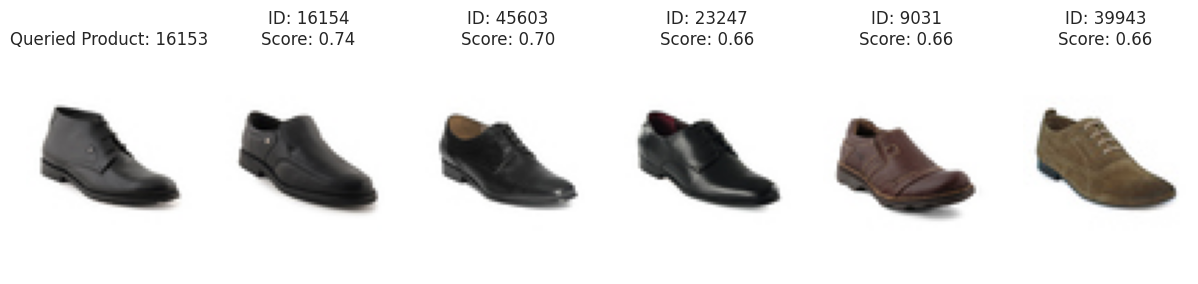

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Set the directory path for images
IMAGE_FOLDER = "/content/images"

def compute_similarities(query_id, embeddings, ids, top_n=5):
    """
    Computes the top N similar products based on cosine similarity.

    Args:
        query_id (int): The ID of the product to query.
        embeddings (ndarray): Array of embeddings for all products.
        ids (ndarray): Array of product IDs corresponding to the embeddings.
        top_n (int): Number of similar products to retrieve.

    Returns:
        tuple: (list of similar IDs, list of similarity scores) or None if query ID is invalid.
    """
    if query_id not in ids:
        print(f"ID {query_id} not found in the dataset.")
        return None

    # Retrieve the embedding for the queried product
    query_index = list(ids).index(query_id)
    query_embedding = embeddings[query_index]

    # Calculate cosine similarity
    similarity_scores = cosine_similarity([query_embedding], embeddings).flatten()

    # Rank the results, excluding the query itself
    ranked_indices = similarity_scores.argsort()[::-1][1:top_n + 1]
    similar_ids = ids[ranked_indices]
    similar_scores = similarity_scores[ranked_indices]

    return similar_ids, similar_scores

def visualize_results(query_id, similar_ids, similar_scores):
    """
    Visualizes the queried product and its recommended similar products.

    Args:
        query_id (int): The ID of the queried product.
        similar_ids (list): List of IDs for the similar products.
        similar_scores (list): List of similarity scores for the similar products.
    """
    query_image_path = os.path.join(IMAGE_FOLDER, f"{query_id}.jpg")

    # Check if the query image exists
    if not os.path.exists(query_image_path):
        print(f"Query image not found: {query_image_path}")
        return

    # Load and display the queried product image
    query_image = load_img(query_image_path)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(similar_ids) + 1, 1)
    plt.imshow(query_image)
    plt.title(f"Queried Product: {query_id}")
    plt.axis("off")

    # Display the recommended product images
    for idx, (sim_id, score) in enumerate(zip(similar_ids, similar_scores), start=2):
        sim_image_path = os.path.join(IMAGE_FOLDER, f"{sim_id}.jpg")

        # Check if the recommended image exists
        if not os.path.exists(sim_image_path):
            print(f"Recommended image not found: {sim_image_path}")
            continue

        sim_image = load_img(sim_image_path)
        plt.subplot(1, len(similar_ids) + 1, idx)
        plt.imshow(sim_image)
        plt.title(f"ID: {sim_id}\nScore: {score:.2f}")
        plt.axis("off")

    plt.show()

# Example usage
if __name__ == "__main__":
    QUERY_ID = 16153  # Replace with the desired product ID
    TOP_N = 5         # Number of similar products to display

    # Compute similar products
    result = compute_similarities(QUERY_ID, embeddings, ids, top_n=TOP_N)

    # Display the results if valid
    if result:
        similar_product_ids, similarity_scores = result
        visualize_results(QUERY_ID, similar_product_ids, similarity_scores)


Densenet Embedding

In [32]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
SAVE_PATH = "/content/densenet_embeddings/"  # Path to save embeddings
IMAGE_FOLDER = "/content/images"            # Path to images
CSV_PATH = "/content/styles.csv"            # Path to styles CSV
NUM_IMAGES = 1000                           # Number of images to process

# Create save directory if it doesn't exist
os.makedirs(SAVE_PATH, exist_ok=True)

def initialize_model():
    """
    Initializes and returns the DenseNet121 model for feature extraction.
    """
    return DenseNet121(weights="imagenet", include_top=False)

def get_image_path(img_name):
    """
    Constructs the full image path from the image name.
    """
    return os.path.join(IMAGE_FOLDER, img_name)

def process_image(model, img_name):
    """
    Preprocesses and extracts features for a given image using the DenseNet model.
    """
    try:
        img = load_img(get_image_path(img_name), target_size=(IMG_WIDTH, IMG_HEIGHT))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return model.predict(img_array).reshape(-1)  # Flatten output
    except Exception as e:
        print(f"Error processing image {img_name}: {e}")
        return None

def load_data(csv_path, num_images):
    """
    Loads the data from the CSV file and prepares the subset for processing.
    """
    df = pd.read_csv(csv_path, on_bad_lines="skip")
    df_cleaned = df.dropna(subset=["id"])  # Drop rows with NaN in 'id'
    df_cleaned["image"] = df_cleaned["id"].astype(str) + ".jpg"
    return df_cleaned.head(num_images)

def extract_embeddings(model, data_subset):
    """
    Extracts embeddings for the given dataset using the DenseNet model.
    """
    embeddings, ids = [], []

    for idx, row in data_subset.iterrows():
        img_name = row["image"]
        embedding = process_image(model, img_name)
        if embedding is not None:
            embeddings.append(embedding)
            ids.append(row["id"])
        print(f"Processed {len(embeddings)}/{len(data_subset)} images", end="\r")

    return np.array(embeddings), np.array(ids)

def save_embeddings(embeddings, ids, save_path):
    """
    Saves the embeddings and IDs to the specified path.
    """
    np.save(os.path.join(save_path, "densenet_embeddings_1000.npy"), embeddings)
    np.save(os.path.join(save_path, "densenet_ids_1000.npy"), ids)
    print("\nEmbeddings and IDs saved successfully.")

# Main execution
if __name__ == "__main__":
    # Initialize model
    model = initialize_model()

    # Load and prepare data
    data_subset = load_data(CSV_PATH, NUM_IMAGES)

    # Extract embeddings
    embeddings, ids = extract_embeddings(model, data_subset)

    # Save embeddings
    save_embeddings(embeddings, ids, SAVE_PATH)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [38]:
import numpy as np

# Load embeddings and IDs
dense_embeddings = np.load("/content/densenet_embeddings/densenet_embeddings_1000.npy")
dense_ids = np.load("/content/densenet_embeddings/densenet_ids_1000.npy")

# Print the last 5 DenseNet embeddings
print("Last 5 DenseNet Embeddings:")
for i in range(-5, 0):
    print(f"ID: {dense_ids[i]} - Embedding: {dense_embeddings[i]}")
    print("="*50)

# Print the shape of embeddings
print("\nShape of DenseNet Embeddings:", dense_embeddings.shape)

# Display 5 random IDs
import random
random_ids = random.sample(list(dense_ids), 5)
print("\n5 Random IDs from the dataset:")
for rid in random_ids:
    print(rid)


Last 5 DenseNet Embeddings:
ID: 48911 - Embedding: [0.         0.00068528 0.         ... 0.         0.58347905 0.        ]
ID: 29926 - Embedding: [0.         0.00134519 0.         ... 0.         0.06871969 0.        ]
ID: 42417 - Embedding: [0.        0.        0.        ... 0.3292487 0.8909784 0.       ]
ID: 3730 - Embedding: [0.        0.        0.        ... 0.        0.0394029 0.       ]
ID: 26152 - Embedding: [0.         0.00191896 0.         ... 0.         0.06821224 0.        ]

Shape of DenseNet Embeddings: (1000, 50176)

5 Random IDs from the dataset:
52029
59290
5896
3739
19124


Queried Product (ID: 48911):


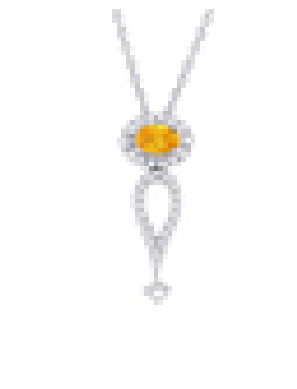

Recommended Products:
Rank 1: ID = 59264, Similarity = 0.4890


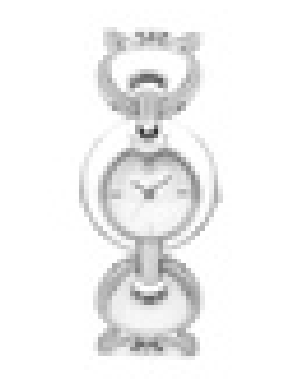

Rank 2: ID = 53591, Similarity = 0.4535


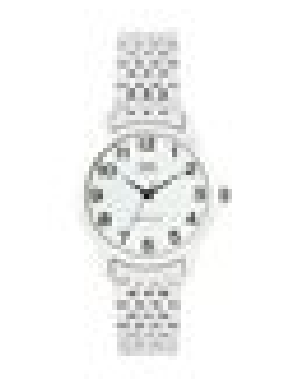

Rank 3: ID = 48772, Similarity = 0.4526


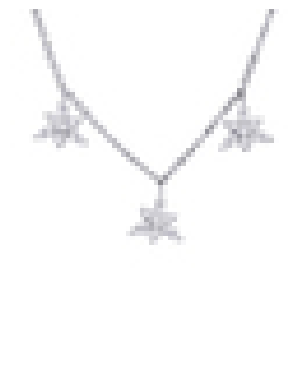

Rank 4: ID = 39711, Similarity = 0.4476


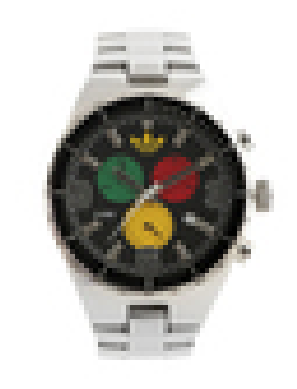

Rank 5: ID = 42614, Similarity = 0.4434


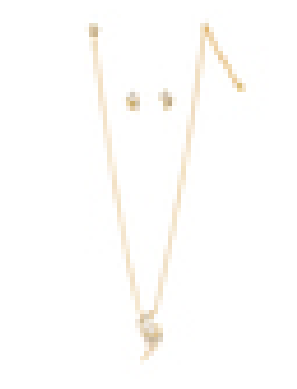

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

# Define image folder path
image_folder = "/content/images"

def show_image(img_id):
    """Displays the image given its ID."""
    img_path = os.path.join(image_folder, f"{img_id}.jpg")
    try:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    except FileNotFoundError:
        print(f"Image for ID {img_id} not found!")

def recommend_product(query_id, embeddings, ids, top_n=5):
    """Recommend top N products based on cosine similarity."""
    try:
        # Find the index of the query ID
        query_index = np.where(ids == query_id)[0][0]
    except IndexError:
        print("The queried ID is not in the dataset!")
        return

    # Get the embedding of the queried product
    query_embedding = embeddings[query_index]

    # Compute cosine similarity between the query and all products
    similarity_scores = cosine_similarity(query_embedding.reshape(1, -1), embeddings).flatten()

    # Get top N similar indices (excluding the queried product itself)
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]

    # Display the query image
    print(f"Queried Product (ID: {query_id}):")
    show_image(query_id)

    # Display recommended products
    print("Recommended Products:")
    for rank, idx in enumerate(similar_indices, start=1):
        recommended_id = ids[idx]
        score = similarity_scores[idx]
        print(f"Rank {rank}: ID = {recommended_id}, Similarity = {score:.4f}")
        show_image(recommended_id)

def example_recommendation():
    """Example function to load embeddings and recommend products."""
    # Load embeddings and IDs
    dense_embeddings = np.load("/content/densenet_embeddings/densenet_embeddings_1000.npy")
    dense_ids = np.load("/content/densenet_embeddings/densenet_ids_1000.npy")

    # Define query product ID
    query_id = 48911  # Replace with your desired query ID
    recommend_product(query_id, dense_embeddings, dense_ids, top_n=5)

# Run example recommendation
example_recommendation()
